# STATISTICAL ANALYSIS

In [ ]:
%config Completer.use_jedi = False
%autosave 20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


Autosaving every 20 seconds


### Importing Libraries and Data

In [ ]:
from IPython.display import Image
import pandas as pd # dataframe manipulation package
import numpy as np # for numerical computations 
import matplotlib.pyplot as plt # data viz package

%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') # turn off warnings

In [ ]:
from google import colab
colab.drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path='/content/gdrive/My Drive/colab/'

In [ ]:

modcloth= pd.read_json(path+'/modcloth_final_data.json',lines=True)
modcloth.head()

NameError: ignored

##DESCRIPTIVE STATISTICS

In [ ]:

path='/content/gdrive/My Drive/colab/'
house_prices = pd.read_csv(path+'/prices/housing.csv')
house_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


####Finding measures of central tendency and variability

In [ ]:
house_prices.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

1.**Import housing dataset and find the mean, median, mode, variance and standard deviation of 'total_bedrooms', 'population', 'households', 'median_income','median_house_value'**

2.**Groupby ocean_proximity and find the mean of total_bedrooms 'median_income','median_house_value'**

3.**Groupby ocean_proximity and find the mean,mean, median,and standard deviation of total_bedrooms 'median_income','median_house_value'**

4.**find the interquartile range for total_bedrooms 'median_income','median_house_value'**


In [ ]:
# multiple aggregation functions can be applied simultaneously
house_prices.groupby('ocean_proximity')['total_bedrooms','median_income','median_house_value'].agg(['median','mean','std','min','max'])

total_bedrooms              ... median_house_value          
                        median        mean  ...                min       max
ocean_proximity                             ...                             
<1H OCEAN                438.0  546.539185  ...            17500.0  500001.0
INLAND                   423.0  533.881619  ...            14999.0  500001.0
ISLAND                   512.0  420.400000  ...           287500.0  450000.0
NEAR BAY                 423.0  514.182819  ...            22500.0  500001.0
NEAR OCEAN               464.0  538.615677  ...            22500.0  500001.0

[5 rows x 15 columns]

####Finding Quartiles, Quantiles, and Interquartile Range

Quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample in the same way. 

In [ ]:
# First quartile (Q1)
Q1 = np.percentile(house_prices.total_rooms, 25)
print(Q1)
  
# Third quartile (Q3)
Q3 = np.percentile(house_prices.total_rooms, 75)
print(Q3)
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)

1447.75
3148.0
1700.25


In [ ]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:

# First quartile (Q1)
Q1 = np.percentile(house_prices.median_income, 25)
  
# Third quartile (Q3)
Q3 = np.percentile(house_prices.median_income, 75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)

2.17985


In [ ]:
# First quartile (Q1)
Q1 = np.percentile(house_prices.median_house_value, 25)
  
# Third quartile (Q3)
Q3 = np.percentile(house_prices.median_house_value, 75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)

145125.0


In [ ]:
from scipy import stats


In [ ]:
stats.iqr(house_prices.median_house_value,interpolation="linear")


145125.0

In [ ]:
hig=stats.iqr(house_prices.median_income,interpolation="linear")
print(hig)


2.17985


In [ ]:
low=stats.iqr(house_prices.total_rooms,interpolation="linear")
print(low)


1700.25


In [ ]:
house_prices.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
house_prices.quantile(0.75, numeric_only=True)

longitude               -118.01000
latitude                  37.71000
housing_median_age        37.00000
total_rooms             3148.00000
total_bedrooms           647.00000
population              1725.00000
households               605.00000
median_income              4.74325
median_house_value    264725.00000
Name: 0.75, dtype: float64

In [ ]:
house_prices.quantile(0.5, numeric_only=True)

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
Name: 0.5, dtype: float64

##A/B TESTING (INFERNTIAL STATISTICS)

###T-TEST

In [ ]:
path='/content/gdrive/My Drive/colab/'
train_data = pd.read_csv(path+'/titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####One Sample T_testt

In [ ]:
import scipy
from scipy.stats import ttest_1samp

In [ ]:
train_data.Fare.mean()

32.2042079685746

In [ ]:
tscore, pvalue = ttest_1samp(train_data.Fare,popmean=29)
# selecionando o nível de significãncia que por convenção é 0,05
alpha = 0.05
# Aceita ou rejeita H0?
print('t_score: {:.4f}'.format(tscore))
print('pvalue: {:.4f}' .format(pvalue))
print('level of significance: {:.2f}' .format(alpha))
# print('level of significe=%.2f, p_value=%.2f, chi_2=%.2f' % (alpha, p_value,tscore))
if pvalue >= alpha:
    print('There is no significance difference ie they are homogenous. (Acceptt H0) /fail to reject H0')
else:
    print('Ha indicates that there is significant difference ie they re heterogenous"  (reject H0 and accept H1)')

t_score: 1.9247
pvalue: 0.0546
level of significance: 0.05
There is no significance difference ie they are homogenous. (Acceptt H0) /fail to reject H0


In [ ]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
house_prices.median_house_value.mode()

0    500001.0
dtype: float64

In [ ]:
tscore, pvalue = ttest_1samp(house_prices.median_house_value,popmean=500001.0)

# selecionando o nível de significãncia que por convenção é 0,05
alpha = 0.05
# Aceita ou rejeita H0?
print('t_score: {:.4f}'.format(tscore))
print('pvalue: {:.4f}' .format(pvalue))
print('level of significance: {:.2f}' .format(alpha))
# print('level of significe=%.2f, p_value=%.2f, chi_2=%.2f' % (alpha, p_value,tscore))
if pvalue >= alpha:
    print('There is no signd=ificance difference ie they are homogenous. (Acceptt H0)')
else:
    print('Ha indicates that there is significant difference ie they re heterogenous"  (reject H0 and accept H1)')

t_score: -364.9625
pvalue: 0.0000
level of significance: 0.05
Ha indicates that there is significant difference ie they re heterogenous"  (reject H0 and accept H1)


####Two Sample T_testt

In [ ]:
train_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


male were more than female. Inferential statistics helps to understand whether the difference in significant or its due to chance. 

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
male_f=train_data.Fare[train_data.Sex=='male']
female_f=train_data.Fare[train_data.Sex=='female']

male  had higher mean average in Fare compared to their female counterparts, the difference is not statistically significant 

In [ ]:

tscore, pvalue = ttest_ind(male_f,female_f,equal_var=False)

# selecionando o nível de significãncia que por convenção é 0,05
alpha = 0.05
# Aceita ou rejeita H0?
print('t_score: {:.4f}'.format(tscore))
print('pvalue: {:.4f}' .format(pvalue))
print('level of significance: {:.2f}' .format(alpha))
# print('level of significe=%.2f, p_value=%.2f, chi_2=%.2f' % (alpha, p_value,tscore))
if p_value >= alpha:
    print('There is no signd=ificance difference ie they are homogenous. (Acceptt H0)')
else:
    print('Ha indicates that there is significant difference ie they are heterogenous"  (reject H0 and accept H1)')

t_score: -5.0775
pvalue: 0.0000
level of significance: 0.05
Ha indicates that there is significant difference ie they are heterogenous"  (reject H0 and accept H1)


###Z-TEST

In [ ]:
from statsmodels.stats import weightstats as stests
import numpy as np

In [ ]:
data=np.random.normal(loc=3.4,scale=0.1,size=100)
singleValue=3.3

In [ ]:
# Assuming data are normally distributed, we can do z-test
testResult=stests.ztest(data,value=singleValue)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")

p-value is: 2.3588615638248338e-29



In [ ]:
# For me, it is more convincing NOT to assume normal distribution
# Can make a statement like this:

N=len(data)
ave=np.mean(data)
if(singleValue<ave):
    print("Value is less than mean of data and "+str(len(data[data<singleValue]))+" out of "+str(N)+" individual observations are less than value.")
else:
    print("Value is greater than mean of data and "+str(len(data[data>singleValue]))+" out of "+str(N)+" individual observations are greater than value.")
    

Value is less than mean of data and 10 out of 100 individual observations are less than value.


In [ ]:
data= pd.read_csv(path+'/ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
data.shape

(294478, 5)

In [ ]:
lan_page=data.pivot_table(values='landing_page', index='converted', aggfunc='count')
lan_page

,landing_page
converted,
0,259241
1,35237


In [ ]:
sizes = data.pivot_table(values = 'converted', index = 'group', aggfunc = 'count')
sizes

,converted
group,
control,147202
treatment,147276


In [ ]:
s_check = data.groupby(['group','landing_page']).count()
s_check

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [ ]:
s_c = data.groupby(['group','landing_page']).count()
s_c


user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

The data are balanced although they are some records that 

---

have visited new page in control group and old page in 

---

treatment group.

In [ ]:
((s_c.loc[('control','new_page'),'converted']/ sizes.loc['control']).values[0]), ((s_c.loc[('treatment','old_page'),'converted']/sizes.loc['treatment']).values[0])

(0.013097648129780846, 0.013342296097123767)

In [ ]:
(round((s_check.loc[('control','new_page'),'converted']
 / sizes.loc['control']).values[0],4),
round((s_check.loc[('treatment','old_page'),'converted']
 / sizes.loc['treatment']).values[0],4))

(0.0131, 0.0133)

The wrong data make about 1.3% of the groups, thus we decide to remove them without huge loss.



In [ ]:
mas = ((data['group'] == 'treatment')&(data['landing_page'] == 'new_page'))|((data['group'] == 'control')&(data['landing_page'] == 'old_page'))
data = data.loc[mas].copy()

In [ ]:
s_check = data.groupby(['group','landing_page']).count()
s_check

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [ ]:
data.groupby(['group','converted']).count()['user_id']


group      converted
control    0            127785
           1             17489
treatment  0            128047
           1             17264
Name: user_id, dtype: int64

In [ ]:
means = data.pivot_table(values = 'converted', index = 'group', aggfunc = 'mean')
means

,converted
group,
control,0.120386
treatment,0.118807


Let us estimate the sample means for our two groups.

####Testing the hypothesis using Z-test


In [ ]:
n = sizes.loc['control'].values[0]
m = sizes.loc['treatment'].values[0]
print(n,m)
Xhat = means.loc['control'].values[0]
Yhat = means.loc['treatment'].values[0]
phat = data['converted'].sum()/len(data['converted']) 
print(Xhat,Yhat)
print(phat)


147202 147276
0.1203863045004612 0.11880724790277405
0.11959667567149027


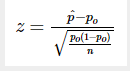


In [ ]:
Z_val = (Yhat - Xhat)/(np.sqrt((phat*(1-phat)*(1/n + 1/m))))
Z_val

-1.3203641490491862

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
mask_treatment = data['group'] == 'treatment'
treatment_ones = data.loc[mask_treatment, 'converted'].value_counts().loc[1]
mask_control = data['group'] == 'control'
control_ones = data.loc[mask_control, 'converted'].value_counts().loc[1]

In [ ]:
z_test = proportions_ztest(
    count = [treatment_ones,control_ones],
    nobs = [sizes.loc['treatment'].values[0],sizes.loc['control'].values[0]],
    value = 0,
    alternative = 'two-sided',
    prop_var = False
)
print('The value of the Z statistic is %0.3f and the p-value is %0.3f' % (z_test[0],z_test[1]))

The value of the Z statistic is -1.335 and the p-value is 0.182


The  p -value is bigger that 0.05, thus we can't reject the hypothesis that  p1=p2 .

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint


In [ ]:
control_results = data[data['group'] == 'control']['converted']
treatment_results = data[data['group'] == 'treatment']['converted']


In [ ]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: 1.31
p-value: 0.190
ci 95% for control group: [0.119, 0.122]
ci 95% for treatment group: [0.117, 0.120]


Since our  p -value=0.732 is way above our  α =0.05, we cannot reject the null hypothesis  H0 , which means that our new design did not perform significantly different (let alone better) than our old one

Additionally, if we look at the confidence interval for the treatment group ([0.117, 0.12], i.e. 11.7-12.0%) we notice that:

It includes our baseline value of 12% conversion rate It does not include our target value of 14% (the 2% uplift we were aiming for) What this means is that it is more likely that the true conversion rate of the new design is similar to our baseline, rather than the 14% target we had hoped for. This is further proof that our new design is not likely to be an improvement on our old design, and that unfortunately we are back to the drawing board!

###Chi-Square

In [ ]:
import scipy

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
data.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [ ]:
data.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [ ]:
group& converted
landing_page and grouop

In [ ]:
tabela_chi = pd.crosstab(data.landing_page,
                           data.converted, normalize=False)

tabela_chi

converted,0,1
landing_page,,
new_page,129741,17498
old_page,129500,17739


In [ ]:
chi_2, p_value, gol,frequency= chi2_contingency(tabela_chi,correction=False)

# selecionando o nível de significãncia que por convenção é 0,05
alpha = 0.05
# Aceita ou rejeita H0?
print('level of significe=%.2f, p_value=%.2f, chi_2=%.2f' % (alpha, p_value,chi_2))


level of significe=0.05, p_value=0.17, chi_2=1.87


In [ ]:
data.columns

**Exercise**
1. Validate if there is association between group and landing_page
2. Validate if there is association between group and converted

In [ ]:
from eda_report.multivariate import MultiVariable
MultiVariable(train_data)

[INFO 19:52:44.410] NumExpr defaulting to 2 threads.
Bivariate analysis: 100%|██████████████████████████████████████████| 21/21 [00:10<00:00,  2.06it/s]


        Overview
Numeric features: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
Categorical features: Name, Sex, Ticket, Cabin, Embarked

        Summary Statistics (Numeric features)
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

        Summary Statistics 

###ANOVA

####ANOVA with one categorical feature

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_lm=ols('Age ~ C(Survived)', data=train_data).fit() #Specify C for Categorical
sm.stats.anova_lm(titanic_lm, typ=2)

,sum_sq,df,F,PR(>F)
C(Survived),897.187582,1.0,4.271195,0.039125
Residual,149559.448362,712.0,NaN,NaN


The Probability of the F statistic is statistically significant (PR(>F)  because it is less than  0.05 level of significance. Meaning the information in Survived has predictive power for Age[link text

####ANOVA with categorical and numerical features (many features)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
tit_lm=ols('Age ~ C(Survived) + Fare + Pclass+SibSp+Parch', data=train_data).fit() #Specify C for Categorical
sm.stats.anova_lm(tit_lm, typ=2)

,sum_sq,df,F,PR(>F)
C(Survived),6771.328093,1.0,43.722777,7.454055e-11
Fare,280.683556,1.0,1.812387,1.786531e-01
Pclass,19878.783652,1.0,128.358221,1.842179e-27
SibSp,8209.182954,1.0,53.007072,8.864518e-13
Parch,263.618909,1.0,1.702199,1.924245e-01
Residual,109647.662271,708.0,NaN,NaN


**Exercise**
Use ANOVA to test population across various groups(features) in Housing price. (dependent variable is median_house_value)

In [ ]:
tit_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.63e-46
Time:                        11:49:09   Log-Likelihood:                -2810.3
No. Observations:                 714   AIC:                             5633.
Df Residuals:                     708   BIC:                             5660.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           53.3246      1.962     27.179      0.000      49.473      57.177
C(Survived)[T.1]    -6.7815      1.026     -6.612      0.000      -8.795      -4.768
Fare                -0.0149      0.011     -1.346      0.179      -0.037       0.007
Pclass              -8.0316      0.709    -11.330      0.000      -9.423      -6.640
SibSp               -3.9948      0.549     -7.281      0.000      -5.072      -2.918
Parch               -0.7920      0.607     -1.305      0.192      -1.984       0.400
==============================================================================
Omnibus:                       22.999   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.353
Skew:                           0.436   Prob(JB):                     5.15e-06
Kurtosis:                       3.241   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The .summary() is useful when you do ANOVA with a model with more than one feature because the statsmodel .anova_lm() does not print the total F-statistic for the model by default. By default it shows the F-statistic contributed by each feature. Here we see the F-statistic is 188 for the whole model with a Prob (F-statistic) < 0.05, so we reject the null hypothesis.

### OLS

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [ ]:
house_prices.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
price_ols=ols(formula='median_house_value~C(ocean_proximity)+longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income',data=house_prices)

In [ ]:
pric_fit=price_ols.fit()
pric_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:03:14   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -2.27e+06    8.8e+04    -25.791      0.000   -2.44e+06    -2.1e+06
C(ocean_proximity)[T.INLAND]     -3.928e+04   1744.258    -22.522      0.000   -4.27e+04   -3.59e+04
C(ocean_proximity)[T.ISLAND]      1.529e+05   3.07e+04      4.974      0.000    9.26e+04    2.13e+05
C(ocean_proximity)[T.NEAR BAY]   -3954.0516   1913.339     -2.067      0.039   -7704.350    -203.753
C(ocean_proximity)[T.NEAR OCEAN]  4278.1343   1569.525      2.726      0.006    1201.739    7354.530
longitude                        -2.681e+04   1019.651    -26.296      0.000   -2.88e+04   -2.48e+04
latitude                         -2.548e+04   1004.702    -25.363      0.000   -2.75e+04   -2.35e+04
housing_median_age                1072.5200     43.886     24.439      0.000     986.501    1158.540
total_rooms                         -6.1933      0.791     -7.825      0.000      -7.745      -4.642
total_bedrooms                     100.5563      6.869     14.640      0.000      87.093     114.019
population                         -37.9691      1.076    -35.282      0.000     -40.078     -35.860
households                          49.6173      7.451      6.659      0.000      35.012      64.222
median_income                     3.926e+04    338.005    116.151      0.000    3.86e+04    3.99e+04
==============================================================================
Omnibus:                     5049.292   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19123.138
Skew:                           1.197   Prob(JB):                         0.00
Kurtosis:                       7.090   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared**  R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.646 would mean our **model explains 64.7% of the change in our median_house_value variable**

EXplain for P>|t| and Prob (F-statistic)

The formula is provided as a string, in the following form: ‘dependent variable ~ list of independent variables separated by the + symbol’

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols(formula='Survived~Pclass+Age1+Embarked11+Parch+Fare+Sex1', data=train_data)
fitted3 = model.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     94.09
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.38e-91
Time:                        06:03:24   Log-Likelihood:                -401.95
No. Observations:                 891   AIC:                             817.9
Df Residuals:                     884   BIC:                             851.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3168      0.072     18.334      0.000       1.176       1.458
Pclass        -0.1709      0.019     -8.779      0.000      -0.209      -0.133
Age1          -0.0047      0.001     -4.757      0.000      -0.007      -0.003
Embarked11    -0.0388      0.017     -2.318      0.021      -0.072      -0.006
Parch         -0.0359      0.017     -2.093      0.037      -0.070      -0.002
Fare           0.0001      0.000      0.446      0.656      -0.000       0.001
Sex1          -0.5105      0.028    -18.164      0.000      -0.566      -0.455
==============================================================================
Omnibus:                       37.465   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.361
Skew:                           0.527   Prob(JB):                     1.04e-09
Kurtosis:                       3.070   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Covariance** Type is listed as nonrobust. Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.

**R-squared** is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.39 would mean our model explains 39.0% of the change in our 'Survived' variable.

 **F-statistic** in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. **Prob (F-Statistic)** uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 2.38e-91 chance of this. Log-likelihood is a numerical signifier of the likelihood that your produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model.
 
** Akaike's Information Criteria (AIC) ** and  **Bayesian Information Criteria(BIC)** are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

**Omnibus** describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. Prob(Omnibus) is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution. 
**Skew** is a measurement of symmetry in our data, with 0 being perfect symmetry. 
**Kurtosis** measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

**Durbin-Watson** is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. 
**Jarque-Bera (JB)** and Prob(JB) are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. Condition number is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.

Distribution

In [ ]:
import seaborn as sns

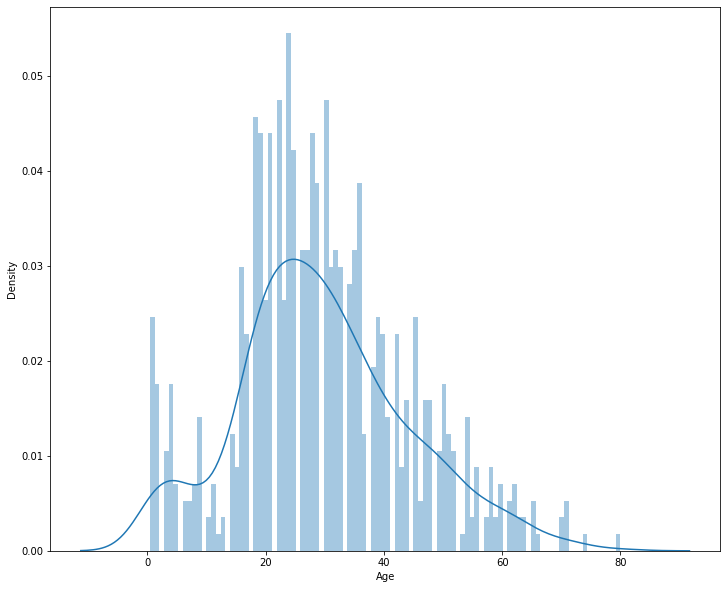

In [ ]:
## Let's look at the his
plt.subplots(figsize = (12,10),)
sns.distplot(train_data.Age, bins = 100, kde = True, rug = False, norm_hist=False);

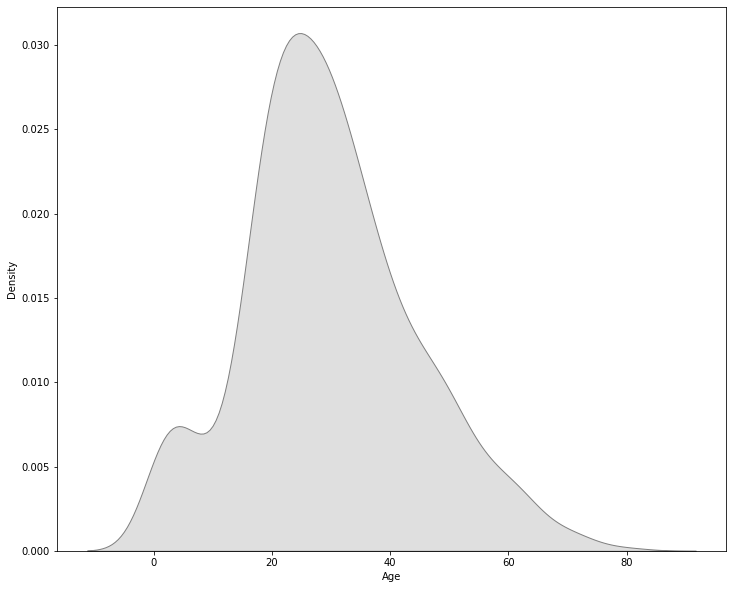

In [ ]:
plt.subplots(figsize = (12,10),)
sns.kdeplot(train_data.Age,color='gray',shade=True);

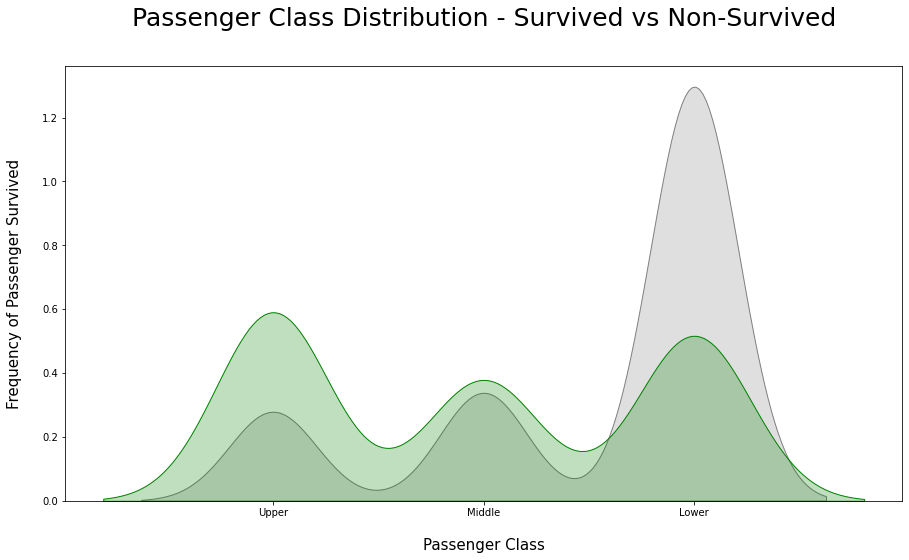

In [ ]:

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train_data.Pclass[train_data.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upperd', 'Middle', 'Lower']
plt.xticks(sorted(train_data.Pclass.unique()), labels);

This KDE plot is pretty self-explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second.

Summary

The first class passengers had the upper hand during the tragedy. You can probably agree with me more on this, in the next section of visualizations where we look at the distribution of ticket fare and survived column.

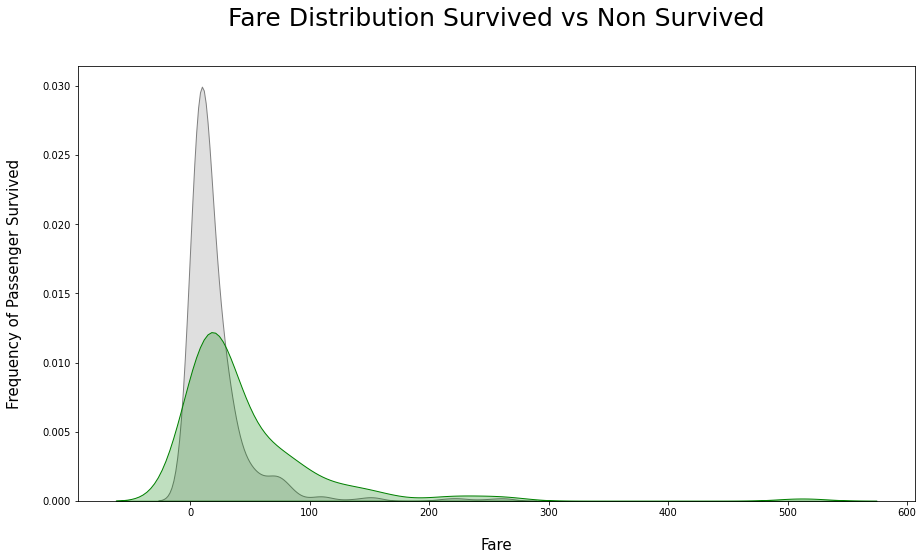

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

This plot shows something impressive..

The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment.

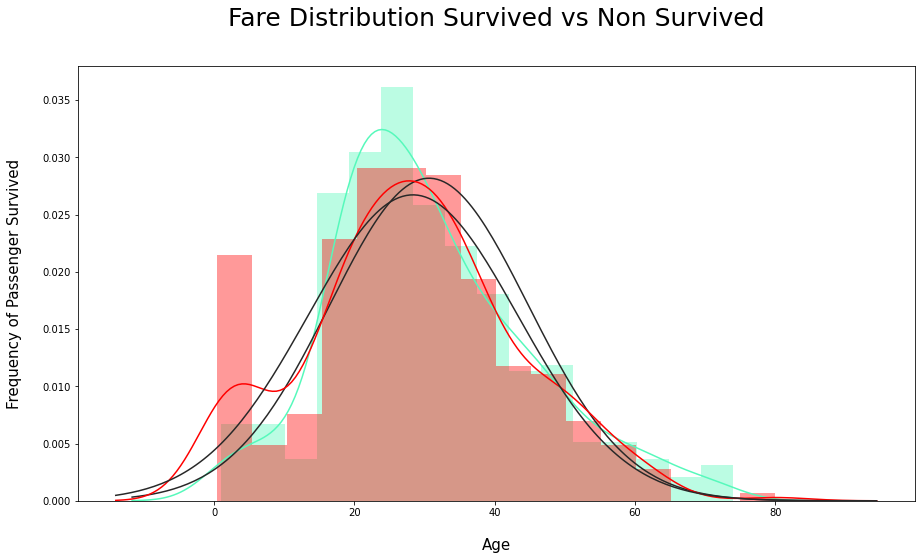

In [ ]:
# Kernel Density Plot
from scipy.stats import norm
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(train_data.loc[(train_data['Survived'] == 0),'Age'] , fit=norm, color='#56F9BB',label='not survived')
ax=sns.distplot(train_data.loc[(train_data['Survived'] == 1),'Age'] ,fit=norm, color='r', label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Age", fontsize = 15, labelpad = 20);



```
# This is formatted as code
```



####Hypotheses Testing

The Medical Rehabilitation Education Foundation reports that the average cost of rehabilitation for stroke victims is 24,672 dollars.To see if the average cost of rehabilitation is different at a large hospital, a researcher selected a random sample of 35 stroke victims and found that the average cost of their rehabilitation is 25,226 dollars.The standard deviation of the population is 3251 dollars. At α =0.01,can it be concluded that the average cost at a large hospital is different from 24,672 dollars?

**Two-tailed Tests**
H0:the average cost at a large hospital is not different from 24,672 dollars

H1:the average cost at a large hospital is different from 24,672 dollars (the claim)

H0: μ = 24,672 

H1: μ ≠ 24,672(claim)

Find the critical value(s)

In [ ]:
#import scipy package for statistical operations
import scipy.stats as st

#Since α =0.01,and the test is a two tailled test,the α of two tailed test is computed as
α =0.01
α_two_tailled = α/2

#Thus the critical value is given by:
#Since it is a two-tailled test, the critical values are –2.576 and +2.576
print('The critical values are:',round(st.norm.ppf(1-(α_two_tailled)),3),'and', -(round(st.norm.ppf(1-(α_two_tailled)),3)))


The critical values are: 2.576 and -2.576


**Compute the test value**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as mt
import statistics as sts
from scipy import stats as st
import matplotlib.pyplot as plt


z=round((25226-24672)/(3251/ mt.sqrt(35)),2)
#To test value
print('The test value is',z)

The test value is 1.01


**Visualize it on normal distribution graph**

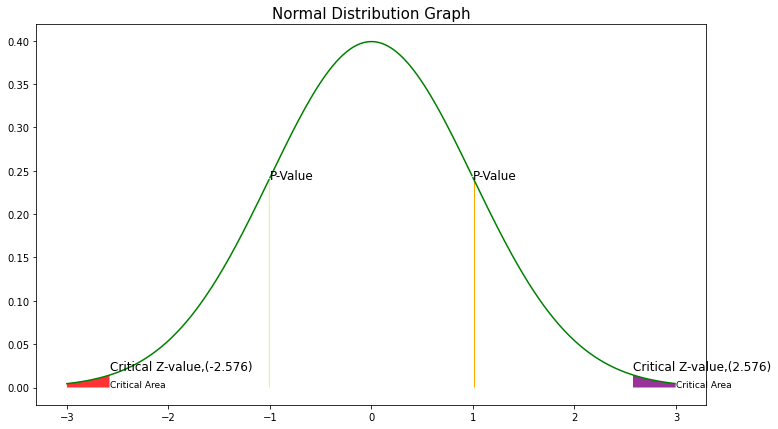

In [ ]:
#To plot a normal graph of size (12,7) with x-axis from -3 to 3 and colour the graph green with colour intensity of 0.8

plt.figure(figsize=(12,7))
plt.plot(np.arange(-3,-1,0.01),st.norm.pdf(np.arange(-3,-1,0.01)),'g')
plt.fill_between(x=np.arange(-3,-1,0.01), 
                 y1= st.norm.pdf(np.arange(-3,-1,0.01)) ,
                 facecolor='white',
                 alpha=0.8)
plt.plot(np.arange(-1,1,0.01),st.norm.pdf(np.arange(-1,1,0.01)),'g')
plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= st.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='white',
                 alpha=0.8)
plt.plot(np.arange(1,3,0.01),st.norm.pdf(np.arange(1,3,0.01)),'g')
plt.fill_between(x=np.arange(1,3,0.01), 
                 y1= st.norm.pdf(np.arange(1,3,0.01)) ,
                 facecolor='white',
                 alpha=0.8)

#To show the two separate visualization since it is two-tailled
    
#To draw a yellow line to show the p-value and the z calculated of the left tail 

plt.fill_between(x=np.arange(-z,-z+0.01,0.01), 
                 y1= st.norm.pdf(np.arange(-z,-z+0.01,0.01)) ,
                 facecolor='yellow')

#To fill red colour on the left hand side critical area

plt.fill_between(x=np.arange(-3,-2.576,0.01), 
                 y1= st.norm.pdf(np.arange(-3,-2.576,0.01)) ,
                 facecolor='red',
                 alpha=0.8)

#To draw an orange line to show the p-value and the z calculated of the right tail 

plt.fill_between(x=np.arange(z,z+0.01,0.01), 
                 y1= st.norm.pdf(np.arange(z,z+0.01,0.01)) ,
                 facecolor='orange')

#To fill purple colour on the right hand side critical area

plt.fill_between(x=np.arange(2.576,3,0.01), 
                 y1= st.norm.pdf(np.arange(2.576,3,0.01)) ,
                 facecolor='purple',
                 alpha=0.8)

#To lable the P-Value, Critical Z-value and the Critical Area, giving the font size of the labels on the left tail

plt.text(x=-1, y=0.24, s= "P-Value", fontsize=12)
plt.text(x=-2.576, y=0.02, s= "Critical Z-value,(-2.576)",fontsize=12)
plt.text(x=-2.576, y=0.00, s= "Critical Area",fontsize=9)

#To lable the P-Value, Critical Z-value and the Critical Area, giving the font size of the labels on the right tail
#To give the title

plt.text(x=1, y=0.24, s= "P-Value", fontsize=12)
plt.text(x=2.576, y=0.02, s= "Critical Z-value,(2.576)",fontsize=12)
plt.text(x=3, y=0.00, s= "Critical Area",fontsize=9)
plt.title("Normal Distribution Graph",fontsize=15)
plt.show()